https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8


#White Noise

In [3]:
import librosa
signal, sr = librosa.load("/content/signal.wav")
sr

22050

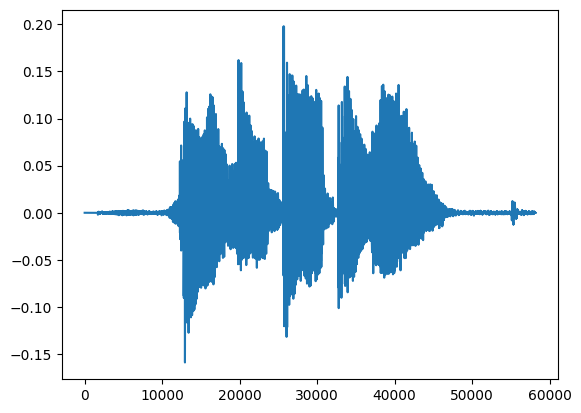

In [4]:
import matplotlib.pyplot as plt
plt.plot(signal)

In [5]:
import numpy as np
import math
RMS=math.sqrt(np.mean(signal**2))
RMS

0.029260135502390677

In [6]:
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

In [7]:
def to_polar(complex_ar):
    return np.abs(complex_ar),np.angle(complex_ar)

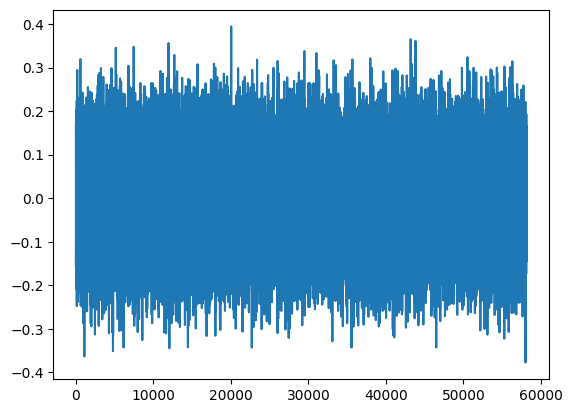

In [8]:
white_noise=get_white_noise(signal, -10)
plt.plot(white_noise)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


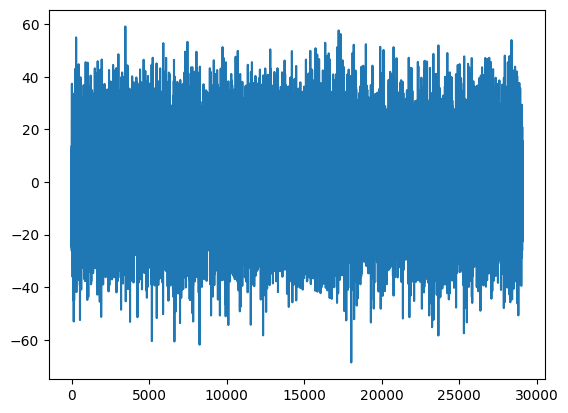

In [9]:
#frequency analysis
X=np.fft.rfft(white_noise)
radius,angle=to_polar(X)
plt.plot(X)

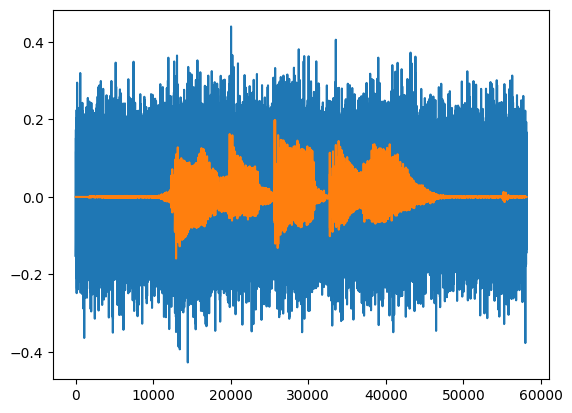

In [10]:
signal_noise = signal+white_noise
plt.plot(signal_noise)
plt.plot(signal)

In [11]:
from scipy.io.wavfile import write
write("whitenoise-1.wav",sr,signal_noise)


#Natural Noise

In [26]:
def get_noise_from_sound(signal,noise,SNR):
    RMS_s=math.sqrt(np.mean(signal**2))
    #required RMS of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))

    #current RMS of noise
    RMS_n_current=math.sqrt(np.mean(noise**2))
    noise=noise*(RMS_n/RMS_n_current)

    return noise

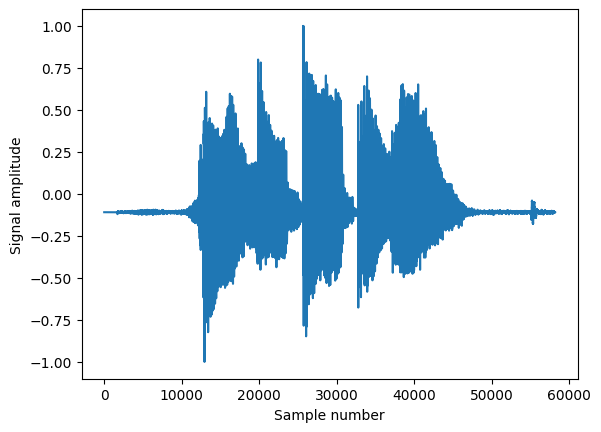

In [27]:
signal, sr = librosa.load("/content/signal.wav")
signal=np.interp(signal, (signal.min(), signal.max()), (-1, 1))
plt.plot(signal)
plt.xlabel("Sample number")
plt.ylabel("Signal amplitude")
plt.show()


In [37]:
noise_file='/content/noise_nishant.wav'
noise_file1='/content/noise_mumuksh.wav'
noise, sr = librosa.load(noise_file)
noise1, sr1 = librosa.load(noise_file1)
noise=np.interp(noise, (noise.min(), noise.max()), (-1, 1))
noise1=np.interp(noise1, (noise1.min(), noise1.max()), (-1, 1))

#crop noise if its longer than signal
#for this code len(noise) shold be greater than len(signal)
#it will not work otherwise!
if(len(noise)>len(signal)):
    noise=noise[0:len(signal)]
if(len(noise1)>len(signal)):
    noise1=noise1[0:len(signal)]

SNR = -20.0
SNR1 = -10.0


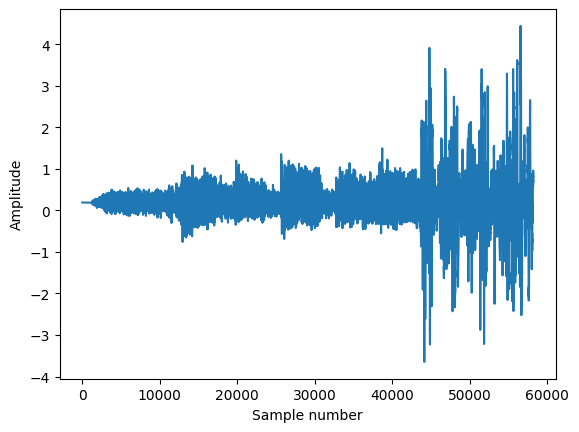

In [41]:
noise=get_noise_from_sound(signal,noise,SNR=-20)
noise1=get_noise_from_sound(signal,noise1,SNR=-10)
signal_noise=signal+noise
signal_noise1=signal+noise1

print("SNR = " + str(20*np.log10(math.sqrt(np.mean(signal**2))/math.sqrt(np.mean(noise**2)))))
print("SNR1 = " + str(20*np.log10(math.sqrt(np.mean(signal**2))/math.sqrt(np.mean(noise1**2)))))
plt.plot(signal_noise1)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.show()

In [44]:
from scipy.io.wavfile import write
write("natural_noise15.wav",sr1,signal_noise1)